In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import nls

0.00767771367774 130.247107664 2.32439699762e-05 43021.9106729
130.247110573
  NIT    FC           OBJFUN            GNORM
    1     1     2.465681E+01     7.022365E+00
    2     2     2.463434E+01     7.019165E+00
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 24.634337156885426
            Iterations: 2
            Function evaluations: 2
            Gradient evaluations: 2


<IPython.core.display.Javascript object>


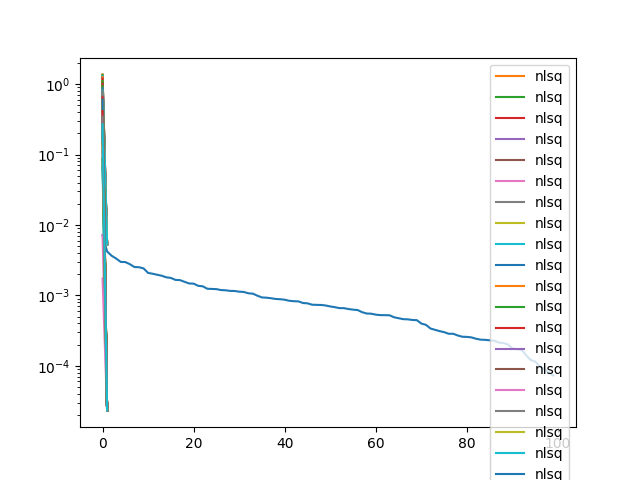

In [2]:
N = 100
y = 2
T = N * y

Sigma, tau = nls.H_cov(N)
X = nls.sample(Sigma, T)
S = nls.cov(X)
L, U = nls.eig(S)

alpha = U.T.dot(np.ones(N))
C = U.T.dot(Sigma).dot(U)
A = C * alpha

z_raw = np.linalg.solve(A, alpha)

print(L[0], 1 / L[0], L[-1], 1 / L[-1])
z_min, z_max = 1 / L[0], 1e16
z_iso = nls.isotonic_lsq(A, alpha, z_min, z_max)
print(np.min(z_iso))

_, d_kfold = nls.nls_kfold_cv(X, S, 10)
d_isokfold = nls.isotonic_regression(d_kfold)
trace = np.sum(d_isokfold)
d_minvar_oracle_nlsq = nls.minvar_nls_nlsq(C, alpha, trace, d_isokfold, L[-1], L[0])

# trace = np.sum(np.linspace(1., .1, N))
# d_min = 0.
# d_max = 2.
# y, d_minvar_oracle_nlsq = nls.minvar_nls_nlsq(C, alpha, trace, np.linspace(1., .1, N)**2, d_min, d_max)

fig, ax = plt.subplots()
ax.semilogy(tau)
# ax.semilogy(1 / z_iso)
# ax.plot(y)
ax.plot(d_minvar_oracle_nlsq, label='nlsq')
ax.legend()
# fig, ax = plt.subplots(nrows=2, figsize=(6, 8))
# t = np.linspace(0, 1, N)
# ax[0].plot(t, tau)
# # ax.plot(t, z)
# ax[0].plot(t, 1 / z_raw)
# ax[0].set_title('raw z')

# ax[1].plot(t, tau, label='tau')
# ax[1].plot(t, L, label='sample')
# # ax.plot(t, z)
# ax[1].plot(t, 1 / z_iso, label='d iso')
# ax[1].legend()
# ax[1].set_title('iso z')
# ax[1].set_ylim(0, 1.2 * L[0]);
# # ax[1].set_xlim(-.01, .05)

In [ ]:
N = 100
y = 2
T = N * y

array([[ 1., -1.,  0.,  0.],
       [ 0.,  1., -1.,  0.],
       [ 0.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  1.]])

In [ ]:
fig, ax = plt.subplots()
for N in [100, 500, 1000, 2000]:
    x = np.linspace(0, 1, N)
    Sigma, tau = nls.H_cov(N)
    ax.semilogy(x, nls.annualize_vol(tau), label='N={}'.format(N))
ax.legend()

In [ ]:
Nvals = [100, 500, 1000]
fig, ax = plt.subplots(nrows=len(Nvals), figsize=(8, 6 * len(Nvals)))

for i, N in enumerate(Nvals):
    Sigma, tau = nls.H_cov(N)
    T = N * y
    X = nls.sample(Sigma, T)
    S = nls.cov(X)
    L = nls.eig(S, return_eigenvectors=False)
    
    _, d_lw_oracle = nls.nls_oracle(X, S, Sigma)
    d_isolw_oracle = nls.isotonic_regression(d_lw_oracle)
    
    _, d_kfold = nls.nls_kfold_cv(X, S, 10)
    d_isokfold = nls.isotonic_regression(d_kfold)
    
    t = np.linspace(0, 1, N)
    ax[i].set_title('N={}'.format(N))
    ax[i].plot(t, tau, label='tau')
    ax[i].plot(t, L, label='sample')
    ax[i].plot(t, d_isolw_oracle, label='isolw_oracle')
    ax[i].plot(t, d_isokfold, label='isokfold')
    ax[i].legend()

In [ ]:
fig, ax = plt.subplots()
for N in [100, 500, 1000, 2000]:
    x = np.linspace(0, 1, N)
    Sigma, tau = nls.SLR_cov(N)
    ax.semilogy(x, nls.annualize_vol(tau / N), label='N={}'.format(N))
ax.legend()

In [ ]:
Nvals = [100, 500, 1000]
fig, ax = plt.subplots(nrows=len(Nvals), figsize=(8, 6 * len(Nvals)))

for i, N in enumerate(Nvals):
    Sigma, tau = nls.SLR_cov(N)
    T = N * y
    X = nls.sample(Sigma, T)
    S = nls.cov(X)
    L = nls.eig(S, return_eigenvectors=False)
    
    _, d_lw_oracle = nls.nls_oracle(X, S, Sigma)
    d_isolw_oracle = nls.isotonic_regression(d_lw_oracle)
    
    _, d_kfold = nls.nls_kfold_cv(X, S, 10)
    d_isokfold = nls.isotonic_regression(d_kfold)
    
    t = np.linspace(0, 1, N)
    ax[i].set_title('N={}'.format(N))
    ax[i].semilogy(t, tau, label='tau')
    ax[i].semilogy(t, L, label='sample')
    ax[i].semilogy(t, d_isolw_oracle, label='isolw_oracle')
    ax[i].semilogy(t, d_isokfold, label='isokfold')
    ax[i].legend()

In [ ]:
fig, ax = plt.subplots()
# ax.semilogy(tau)


array([ 1.        ,  0.99090909,  0.98181818,  0.97272727,  0.96363636,
        0.95454545,  0.94545455,  0.93636364,  0.92727273,  0.91818182,
        0.90909091,  0.9       ,  0.89090909,  0.88181818,  0.87272727,
        0.86363636,  0.85454545,  0.84545455,  0.83636364,  0.82727273,
        0.81818182,  0.80909091,  0.8       ,  0.79090909,  0.78181818,
        0.77272727,  0.76363636,  0.75454545,  0.74545455,  0.73636364,
        0.72727273,  0.71818182,  0.70909091,  0.7       ,  0.69090909,
        0.68181818,  0.67272727,  0.66363636,  0.65454545,  0.64545455,
        0.63636364,  0.62727273,  0.61818182,  0.60909091,  0.6       ,
        0.59090909,  0.58181818,  0.57272727,  0.56363636,  0.55454545,
        0.54545455,  0.53636364,  0.52727273,  0.51818182,  0.50909091,
        0.5       ,  0.49090909,  0.48181818,  0.47272727,  0.46363636,
        0.45454545,  0.44545455,  0.43636364,  0.42727273,  0.41818182,
        0.40909091,  0.4       ,  0.39090909,  0.38181818,  0.37